In [11]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple
import random
kolumny = int
wiersze = int
oceny = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]

### Wylosować macierz z ocenami z zakresu 2.0-5.5 i przyjąć, że wiersze reprezentują studentów, a kolumny odpowiadają poszczególnym przedmiotom.

In [12]:
def wylosuj_macierz(wielkosc: Tuple[wiersze, kolumny]) -> np.array:
    assert wielkosc[0]>0 and wielkosc[1]>0, "Macierz musi mieć dodatnią wielkość."
    _ = []
    for _w in range(0, wielkosc[0]):
        wiersz = []
        for _k in range(0, wielkosc[1]):
            wiersz.append(random.choice(oceny))
        _.append(wiersz)
    return np.array(_, np.float16)

#### Przykład stworzonej przez nas macierzy:

In [4]:
(macierz := wylosuj_macierz((8,3)))

array([[5. , 3. , 5.5],
       [3. , 2. , 5.5],
       [4.5, 3.5, 4. ],
       [5.5, 5.5, 5.5],
       [3.5, 5.5, 5. ],
       [3. , 2. , 3.5],
       [5. , 3. , 2. ],
       [4. , 5.5, 4.5]], dtype=float16)

Kolumny => Przedmiot
Wiersze => Student

In [5]:
def ile_nie_zaliczylo(n_przedmiotow: int) -> int:
    liczba = 0
    for student in macierz:
        niezaliczone = 0
        for ocena in student:
            if ocena in [2.0, 2.5]:
                niezaliczone += 1
        if niezaliczone >= n_przedmiotow:
            liczba += 1
    return liczba
ile_nie_zaliczylo(1)

3

In [6]:
def min_max_srednia() -> np.array:
    i_min = 0 # index minimum
    a_min = 0.0 # srednia minimum
    i_max = 0 # index maksimum
    a_max = 0.0 # srednia maksimum
    for i, student in enumerate(macierz):
        srednia = student.mean()
        if srednia > a_max:
            i_max = i
        if srednia < a_min:
            i_min = i
    return macierz[i_min], macierz[i_max]
min_max_srednia()

(array([5. , 3. , 5.5], dtype=float16), array([4. , 5.5, 4.5], dtype=float16))

In [7]:
def n_of_max() -> np.array:
    _max = macierz.max()
    n_of_maxes = np.count_nonzero(macierz == _max, axis=1)
    return np.where(np.max(n_of_maxes) == n_of_maxes)
n_of_max()

(array([3]),)

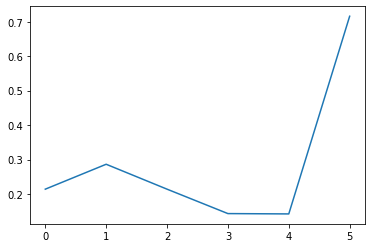

In [15]:
hist, bin_edges = np.histogram(macierz, bins='auto', density=True)
plt.plot(hist)
plt.show()

In [17]:
def lista_ze_srednimi() -> list:
    studenci = []
    for i, student in enumerate(macierz):
        if student.mean() >= 4.0:
            studenci.append(i)
    return studenci
lista_ze_srednimi()

[0, 2, 3, 4, 7]

### Wyznaczyć odległość symetryczną dwóch macierzy o jednakowych wymiarach. Odległość symetryczna dana jest wzorem:
$\sum_{i=1}^{L}\sum_{j=1}^{L}|p_{i,j} - q_{i,j}|$

In [21]:
print((p := wylosuj_macierz((5,5))), end="\n\n")
print((q := wylosuj_macierz((5,5))))

[[4.  4.5 5.5 2.5 4.5]
 [2.  2.5 5.  3.5 4. ]
 [3.5 4.5 3.5 5.5 2.5]
 [2.  4.5 2.  4.  2. ]
 [3.  4.5 4.5 5.  4.5]]

[[4.  3.5 3.5 4.  2. ]
 [5.5 3.  4.5 3.5 3. ]
 [3.  3.5 5.  5.5 5. ]
 [2.  2.  5.5 2.  2.5]
 [2.  2.5 3.  3.5 3. ]]


In [23]:
(odleglosc_symetryczna := (p-q).sum())

7.0